In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AdidasMatchday20240419.csv')

In [3]:
df.columns

Index(['article_id', 'model_id', 'last_id', 'sports_categories', 'gender_last',
       'laces_type', 'vamp_material', 'insole_length', 'ball_girth',
       'ball_width', 'heel_width', 'toe_height', 'heel_spring', 'too_small',
       'too_large'],
      dtype='object')

In [4]:
df.head()

,article_id,model_id,last_id,sports_categories,gender_last,laces_type,vamp_material,insole_length,ball_girth,ball_width,heel_width,toe_height,heel_spring,too_small,too_large
0,3,1,378,Football,Female,laces,mesh,277.4,254.0,95.7,69.5,27.4,5.0,0.275264,0.029188
1,4,1,378,Football,Female,laces,mesh,277.4,254.0,95.7,69.5,27.4,5.0,0.260014,0.040714
2,9,100,346,Running,Male,sock,leather,271.6,238.0,91.3,63.0,24.7,8.0,0.165622,0.023905
3,10,100,346,Running,Male,sock,leather,271.6,238.0,91.3,63.0,24.7,8.0,0.201645,0.025694
4,19,1003,17,Football,Female,sock,leather,270.2,242.5,93.9,65.5,25.2,5.0,0.235819,0.012023


In [5]:
df = pd.get_dummies(df, columns = ['gender_last', 'sports_categories'])

In [6]:
df.head()

,article_id,model_id,last_id,laces_type,vamp_material,insole_length,ball_girth,ball_width,heel_width,toe_height,heel_spring,too_small,too_large,gender_last_Female,gender_last_Male,sports_categories_Basketball,sports_categories_Football,sports_categories_Running
0,3,1,378,laces,mesh,277.4,254.0,95.7,69.5,27.4,5.0,0.275264,0.029188,True,False,False,True,False
1,4,1,378,laces,mesh,277.4,254.0,95.7,69.5,27.4,5.0,0.260014,0.040714,True,False,False,True,False
2,9,100,346,sock,leather,271.6,238.0,91.3,63.0,24.7,8.0,0.165622,0.023905,False,True,False,False,True
3,10,100,346,sock,leather,271.6,238.0,91.3,63.0,24.7,8.0,0.201645,0.025694,False,True,False,False,True
4,19,1003,17,sock,leather,270.2,242.5,93.9,65.5,25.2,5.0,0.235819,0.012023,True,False,False,True,False


In [7]:
df.replace({False: 0, True: 1}, inplace=True)

In [8]:
df.head()

,article_id,model_id,last_id,laces_type,vamp_material,insole_length,ball_girth,ball_width,heel_width,toe_height,heel_spring,too_small,too_large,gender_last_Female,gender_last_Male,sports_categories_Basketball,sports_categories_Football,sports_categories_Running
0,3,1,378,laces,mesh,277.4,254.0,95.7,69.5,27.4,5.0,0.275264,0.029188,1,0,0,1,0
1,4,1,378,laces,mesh,277.4,254.0,95.7,69.5,27.4,5.0,0.260014,0.040714,1,0,0,1,0
2,9,100,346,sock,leather,271.6,238.0,91.3,63.0,24.7,8.0,0.165622,0.023905,0,1,0,0,1
3,10,100,346,sock,leather,271.6,238.0,91.3,63.0,24.7,8.0,0.201645,0.025694,0,1,0,0,1
4,19,1003,17,sock,leather,270.2,242.5,93.9,65.5,25.2,5.0,0.235819,0.012023,1,0,0,1,0


In [9]:
df = df.drop('gender_last_Female', axis=1)

In [10]:
df.columns

Index(['article_id', 'model_id', 'last_id', 'laces_type', 'vamp_material',
       'insole_length', 'ball_girth', 'ball_width', 'heel_width', 'toe_height',
       'heel_spring', 'too_small', 'too_large', 'gender_last_Male',
       'sports_categories_Basketball', 'sports_categories_Football',
       'sports_categories_Running'],
      dtype='object')

In [11]:
# Prepare features and targets
features = df[['gender_last_Male', 'sports_categories_Basketball', 'sports_categories_Football', 'sports_categories_Running', 'too_small', 'too_large']]
targets = df[['insole_length', 'ball_girth', 'ball_width', 'heel_width', 'toe_height', 'heel_spring']]

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Define model and parameter grid
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [250, 300, 350, 400],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [ ]:
# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

In [17]:
model = RandomForestRegressor().fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error

# Predictions and evaluation with the best model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error with Best Model:', mse)

Mean Squared Error with Best Model: 4.919771916492681


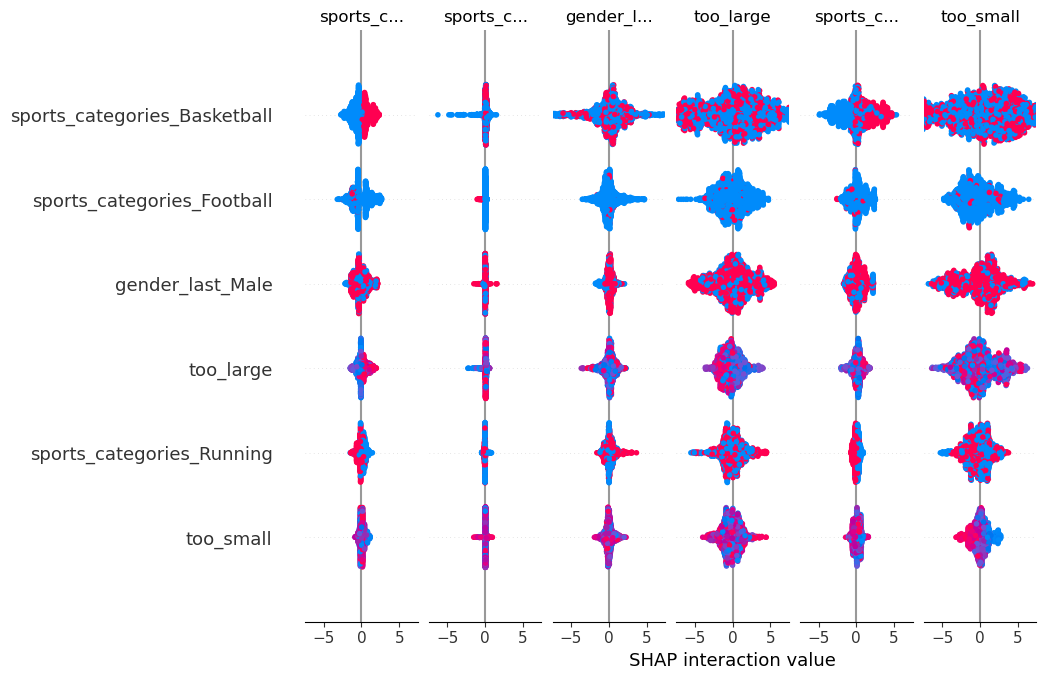

In [23]:
import shap

explainer_rf = shap.Explainer(model)
shap_values_rf = explainer_rf.shap_values(X_train)
    
#Plot Shap Values
shap.summary_plot(shap_values_rf, X_train, feature_names=X_train.columns)